In [1]:
!pip install -q --upgrade datasets==3.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 15.6 MB/s eta 0:00:00


In [2]:
# Let's check the GPU - it should be a Tesla T4

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)
  if gpu_info.find('Tesla T4') >= 0:
    print("Success - Connected to a T4")
  else:
    print("NOT CONNECTED TO A T4")

Mon Dec 29 14:55:38 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import torch
from google.colab import userdata
from huggingface_hub import login
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as sf
from IPython.display import Audio

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


In [4]:
hf_token = userdata.get('HF_TOKEN')
if hf_token and hf_token.startswith("hf_"):
  print("HF key looks good so far")
else:
  print("HF key is not set - please click the key in the left sidebar")
login(hf_token, add_to_git_credential=True)

HF key looks good so far


In [ ]:
my_simple_sentiment_analyzer = pipeline("sentiment-analysis", device='cuda')
result = my_simple_sentiment_analyzer("I'm super excited to be on the way to LLM mastery!")
print(result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


[{'label': 'POSITIVE', 'score': 0.9993460774421692}]


In [ ]:
result = my_simple_sentiment_analyzer("I should be more excited to be on the way to LLM mastery!")
print(result)

[{'label': 'POSITIVE', 'score': 0.900827944278717}]


In [ ]:
better_sentiment = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment", device="cuda")
result = better_sentiment("I should be more excited to be on the way to LLM mastery!!")
print(result)

Device set to use cpu


[{'label': '3 stars', 'score': 0.3944800794124603}]


In [ ]:
result = better_sentiment("This is the best product")
print(result)

[{'label': '5 stars', 'score': 0.891880214214325}]


In [ ]:
better_sentiment = pipeline("sentiment-analysis", model="tabularisai/multilingual-sentiment-analysis", device="cuda")
result = better_sentiment("I should be more excited to be on the way to LLM mastery!!")
print(result)

config.json:   0%|          | 0.00/851 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda


[{'label': 'Negative', 'score': 0.4080951511859894}]


In [ ]:
result = better_sentiment("it is very very hard to solve!")
print(result)

[{'label': 'Negative', 'score': 0.612833559513092}]


In [ ]:
result = better_sentiment("This is the best product")
print(result)

[{'label': 'Very Positive', 'score': 0.5606461763381958}]


In [ ]:
ner = pipeline('ner', device='cuda')
result = ner("AI Engineers are learning about the amazing pipelines from HuggingFace in Google Colab from Ed Donner")
for entity in result:
    print(entity)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


{'entity': 'I-ORG', 'score': np.float32(0.999476), 'index': 1, 'word': 'AI', 'start': 0, 'end': 2}
{'entity': 'I-ORG', 'score': np.float32(0.9962089), 'index': 2, 'word': 'Engineers', 'start': 3, 'end': 12}
{'entity': 'I-ORG', 'score': np.float32(0.8205678), 'index': 11, 'word': 'Hu', 'start': 59, 'end': 61}
{'entity': 'I-ORG', 'score': np.float32(0.651493), 'index': 12, 'word': '##gging', 'start': 61, 'end': 66}
{'entity': 'I-ORG', 'score': np.float32(0.960993), 'index': 13, 'word': '##F', 'start': 66, 'end': 67}
{'entity': 'I-ORG', 'score': np.float32(0.92517126), 'index': 14, 'word': '##ace', 'start': 67, 'end': 70}
{'entity': 'I-MISC', 'score': np.float32(0.8882749), 'index': 16, 'word': 'Google', 'start': 74, 'end': 80}
{'entity': 'I-MISC', 'score': np.float32(0.67307675), 'index': 17, 'word': 'Cola', 'start': 81, 'end': 85}
{'entity': 'I-PER', 'score': np.float32(0.9989441), 'index': 20, 'word': 'Ed', 'start': 92, 'end': 94}
{'entity': 'I-PER', 'score': np.float32(0.99872154), 'i

In [ ]:
question="What are Hugging Face pipelines?"
context="Pipelines are a high level API for inference of LLMs with common tasks"

question_answerer = pipeline("question-answering", device='cuda')
results = question_answerer(question=question, context=context)
print(results)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


{'score': 0.24576981365680695, 'start': 35, 'end': 70, 'answer': 'inference of LLMs with common tasks'}


In [ ]:
summarizer = pipeline("summarization", device="cuda")
text = """
The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing (NLP).
It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering, among others.
It's an extremely popular library that's widely used by the open-source data science community.
It lowers the barrier to entry into the field by providing Data Scientists with a productive, convenient way to work with transformer models.
"""
summarize = summarizer(text, max_length=50, min_length=10, do_sample=False)
print(summarize[0]['summary_text'])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


 The Hugging Face transformers library is an incredibly versatile and powerful tool for natural language processing . It allows users to perform a wide range of tasks such as text classification, named entity recognition, and question answering .


In [6]:
translator = pipeline("translation_en_to_fr", device="cuda")
result = translator("The Data Scientists were truly amazed by the power and simplicity of the HuggingFace pipeline API.")
print(result[0]['translation_text'])

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


Les Data Scientists ont été vraiment étonnés par la puissance et la simplicité de l'API du pipeline HuggingFace.


In [8]:
classifier = pipeline('zero-shot-classification', device='cuda')
sequence_to_classify = "This is a course about the Transformers library"
candidate_labels = ['education', 'politics', 'business']
result = classifier(sequence_to_classify, candidate_labels)
print(result)

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'sequence': 'This is a course about the Transformers library', 'labels': ['education', 'business', 'politics'], 'scores': [0.844595193862915, 0.11197695881128311, 0.04342786595225334]}


In [9]:
generator = pipeline('text-generation', device='cuda')
result = generator("In this course, we will teach you how to")
print(result[0]['generated_text'])

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In this course, we will teach you how to create and use the HTML5 DOM for creating and manipulating DOM objects.

DOM Objects: Using HTML5 and CSS

In this course, we will use HTML5 and CSS to create and manipulate DOM objects.

HTML5 HTML5 DOM Objects

This course is designed to help you create, manipulate, and manipulate DOM objects in a manner that is understandable by most users.

In this course, we'll create and manipulate HTML5 DOM objects.

CSS DOM Objects: Using HTML5 and CSS

In this course, we will create and manipulate CSS DOM objects.

CSS DOM Objects: Using HTML5 and CSS

In this course, we will create and manipulate CSS DOM objects.

CSS DOM Objects: Using HTML5 and CSS

In this course, we will create and manipulate CSS DOM objects.

DOM Objects: Using HTML5 and CSS

In this course, we will create and manipulate CSS DOM objects.

DOM Objects: Using HTML5 and CSS

In this course, we will create and manipulate CSS DOM objects.

DOM Objects: Using HTML5 and CSS

In this cour

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/4 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/diffusers/pipelines/stable_diffusion_xl/pipeline_stable_diffusion_xl.py:748: FutureWarning: `upcast_vae` is deprecated and will be removed in version 1.0.0. `upcast_vae` is deprecated. Please use `pipe.vae.to(torch.float32)`. For more details, please refer to: https://github.com/huggingface/diffusers/pull/12619#issue-3606633695.
  deprecate(


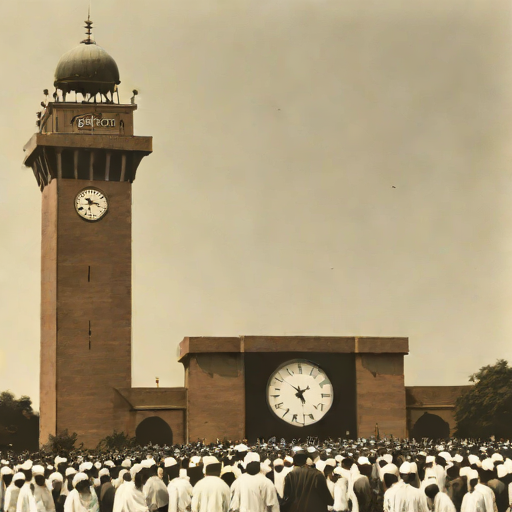

In [10]:
from IPython.display import display
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")
prompt = "Picture of sialkot clock tower with Allama Iqbal giving speach"
image = pipe(prompt=prompt, num_inference_steps=4, guidance_scale=0.0).images[0]
display(image)

In [3]:
from transformers import pipeline
from datasets import load_dataset
import soundfile as sf
import torch
from IPython.display import Audio

synthesiser = pipeline("text-to-speech", "microsoft/speecht5_tts", device='cuda')
embeddings_dataset = load_dataset("matthijs/cmu-arctic-xvectors", split="validation", trust_remote_code=True)
speaker_embedding = torch.tensor(embeddings_dataset[7306]["xvector"]).unsqueeze(0)
speech = synthesiser("Hi to an artificial intelligence engineer, on the way to mastery!", forward_params={"speaker_embeddings": speaker_embedding})

Audio(speech["audio"], rate=speech["sampling_rate"])

Device set to use cuda
